In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot, pylab
from sklearn import tree
import graphviz
from IPython.display import Image

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

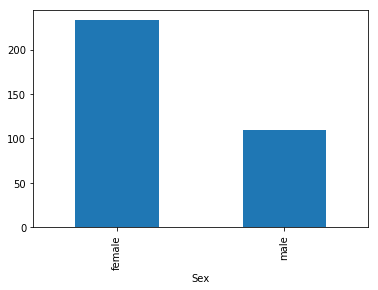

In [4]:
train.groupby('Sex').Survived.sum().plot('bar')

In [5]:
train.groupby('Sex').Survived.sum() / train.groupby('Sex').Survived.count()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

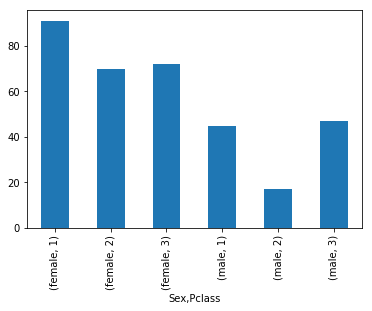

In [6]:
train.groupby(['Sex', 'Pclass']).Survived.sum().plot('bar')

In [7]:
print(train.groupby(['Sex', 'Pclass']).Survived.sum() / train.groupby(['Sex', 'Pclass']).Survived.count())
print(train.groupby(['Sex', 'Pclass']).Survived.count())

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64
Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64


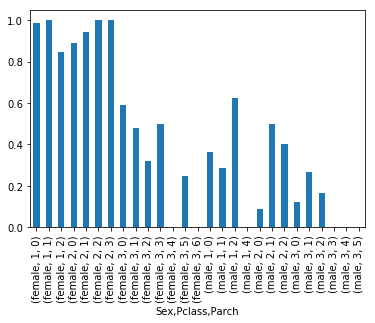

In [8]:
(train.groupby(['Sex', 'Pclass', 'Parch']).Survived.sum() / train.groupby(['Sex', 'Pclass', 'Parch']).Survived.count()).plot('bar')

In [9]:
train.groupby('Parch').Survived.count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

In [10]:
for col in train.columns[1:]:
    print(col, ' ', len(train[pd.isnull(train[col])]))

Survived   0
Pclass   0
Name   0
Sex   0
Age   177
SibSp   0
Parch   0
Ticket   0
Fare   0
Cabin   687
Embarked   2


## First Model using 5 features - Sex, Parch, Pclass
Sex is mapped to 1 or 0 depending on weather the passenger is male or female <br>
Parch is kept as a contuos variable <br>
Pclass is converted into 3 features using one-hot-encoding <br>

In [11]:
first_tree = tree.DecisionTreeClassifier()

In [12]:
# Preping train features

train_df = train
train_df['Sex_Mapped'] = train_df.Sex.map({'male': 1, 'female': 0})

# One-hot encoding class of a passenger
train_df['Pclass_first'] = 0
train_df.loc[train_df.Pclass == 1, 'Pclass_first'] = 1

train_df['Pclass_second'] = 0
train_df.loc[train_df.Pclass == 2, 'Pclass_second'] = 1

train_df['Pclass_third'] = 0
train_df.loc[train_df.Pclass == 3, 'Pclass_third'] = 1

In [13]:
first_tree_fit = first_tree.fit(train_df[['Sex_Mapped', 'Pclass_first', 'Pclass_second', 'Pclass_third', 'Parch']], train_df.Survived)

In [14]:
dot_data = tree.export_graphviz(first_tree_fit, out_file=None) 
graph = graphviz.Source(dot_data)

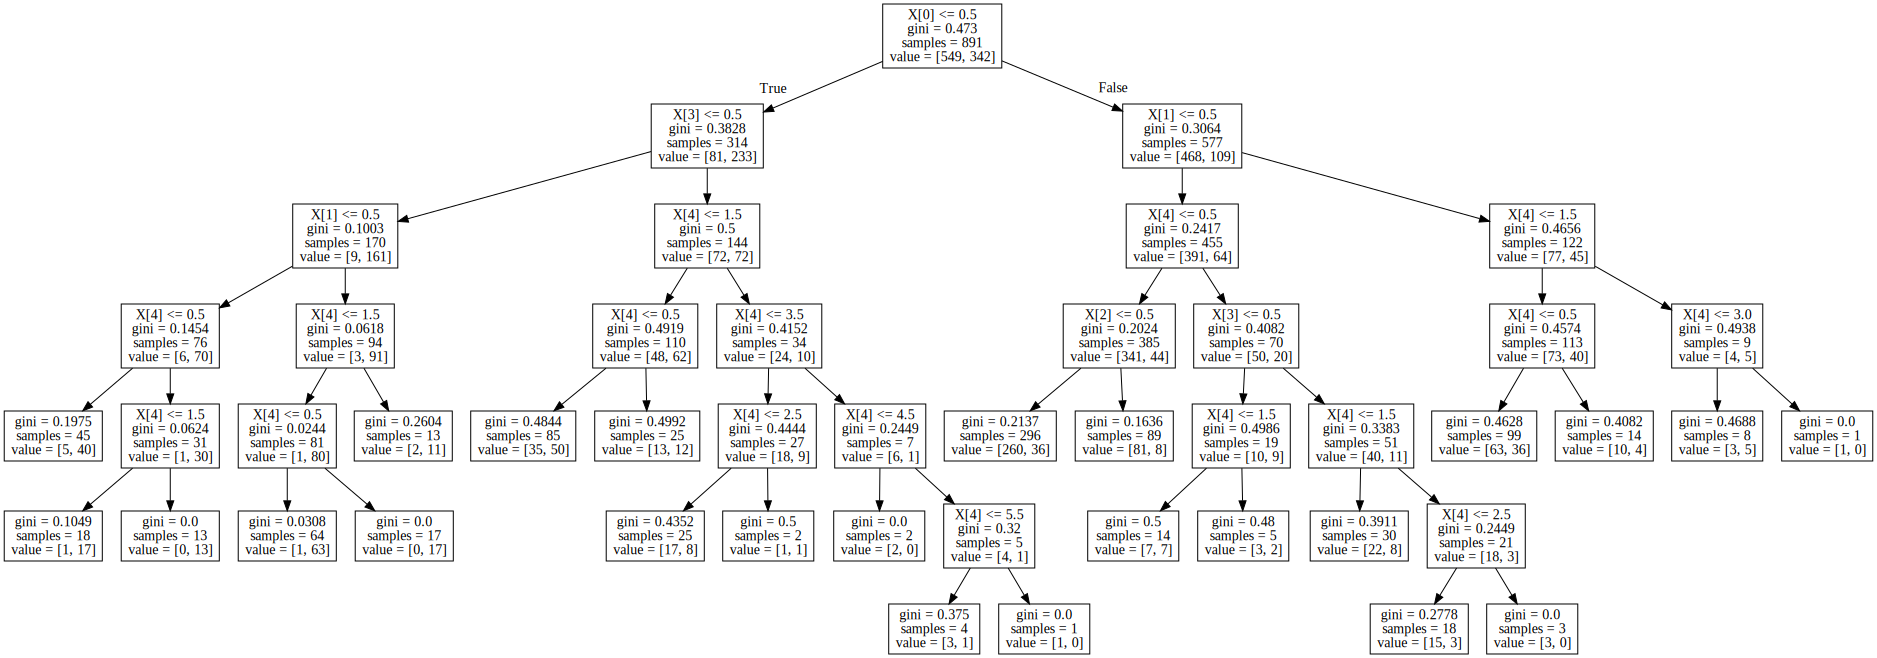

In [15]:
graph

In [16]:
# Preping test features

test_df = test
test_df['Sex_Mapped'] = test_df.Sex.map({'male': 1, 'female': 0})

# One-hot encoding class of a passenger
test_df['Pclass_first'] = 0
test_df.loc[test_df.Pclass == 1, 'Pclass_first'] = 1

test_df['Pclass_second'] = 0
test_df.loc[test_df.Pclass == 2, 'Pclass_second'] = 1

test_df['Pclass_third'] = 0
test_df.loc[test_df.Pclass == 3, 'Pclass_third'] = 1

In [17]:
Y_hat = pd.DataFrame(first_tree_fit.predict(test_df[['Sex_Mapped', 'Pclass_first', 'Pclass_second', 'Pclass_third', 'Parch']]))
Y_hat.columns = ['Survived']
Y_hat.index = test_df.PassengerId

In [18]:
Y_hat.to_csv('first_tree.csv', index_label='PassengerId')

### Lets see how it did

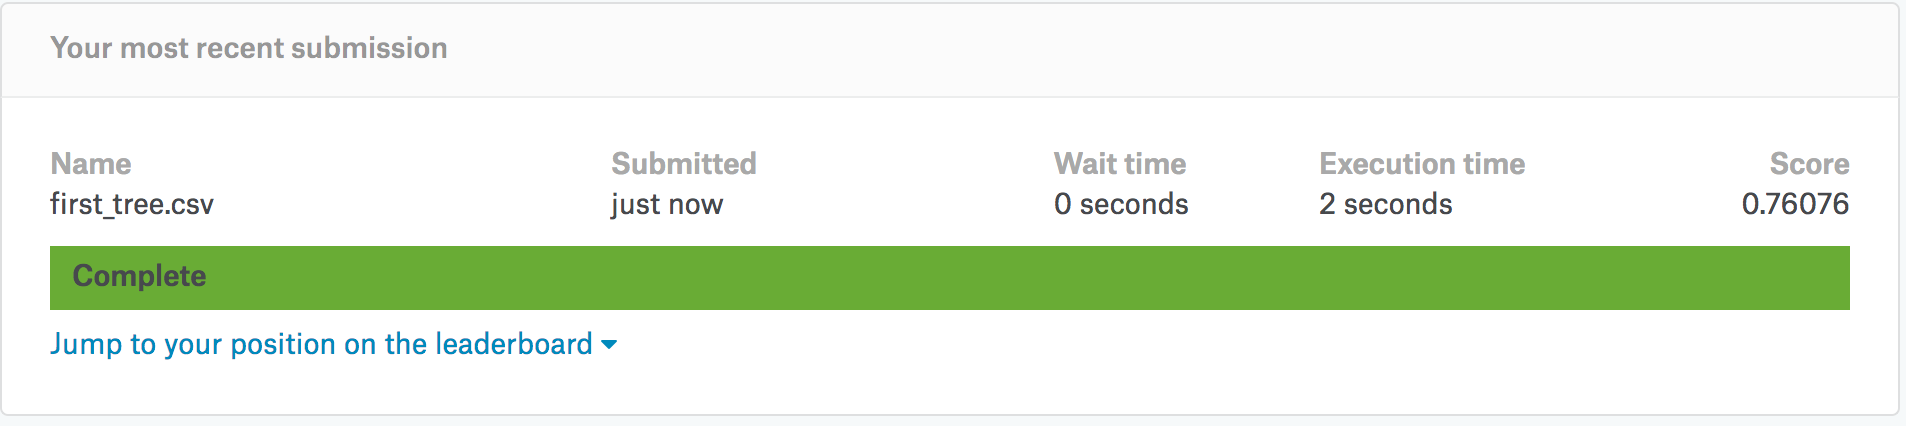

In [67]:
Image("first_tree_results.png")

>Not too bad, can definitely do better!

## Adding more features

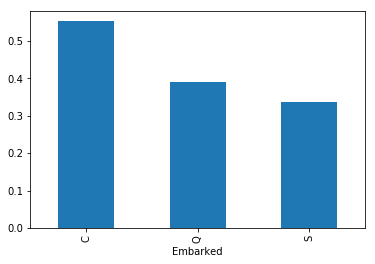

In [22]:
(train.groupby('Embarked').Survived.sum() / train.groupby('Embarked').Survived.count()).plot('bar')

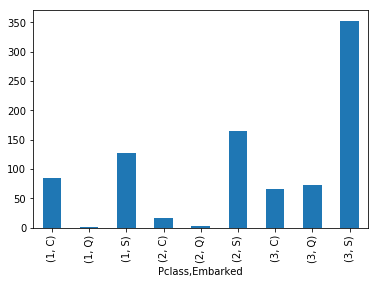

In [24]:
(train.groupby(['Pclass', 'Embarked']).Survived.count()).plot('bar')

In [25]:
train.groupby(['Pclass', 'Embarked']).Survived.sum()/train.groupby(['Pclass', 'Embarked']).Survived.count()

Pclass  Embarked
1       C           0.694118
        Q           0.500000
        S           0.582677
2       C           0.529412
        Q           0.666667
        S           0.463415
3       C           0.378788
        Q           0.375000
        S           0.189802
Name: Survived, dtype: float64